# Incertitude type

Prenons l'exemple d'un pendule de longueur $l$ donc vous souhaitez mesurer la période $T$. 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Pendulum.svg" alt="" width="400" /></a></center>

## 5 mesures

Vous effectuez 5 mesures de la période 

In [1]:
#importation des bibliothèques
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd  

In [2]:
T = np.array([0.934, .916, .903, 0.928, 0.893])

Nous pouvons ensuite calculer la valeur moyenne de la période

In [3]:
Tmoy = np.mean(T)

Et l'écart-type associé (donc l'incertitude)

In [4]:
u_T = np.std(T, ddof=1)

Représentation des histogrammes

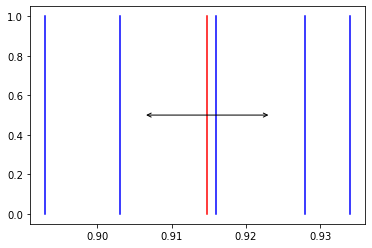

In [5]:
plt.clf()
plt.plot((T,T),(0,1), 'blue')
plt.plot((Tmoy,Tmoy),(0,1), 'red', label='Valeur moyenne')
plt.annotate('',xy=(Tmoy-u_T/2,0.5),xytext=(Tmoy+u_T/2,0.5), arrowprops=dict(arrowstyle='<->'))
plt.show()

In [6]:
print("La moyenne vaut T = ", format(Tmoy, "#.3g"), "s")
print("l'incertitude-type associée : u(T) = ", format(u_T , "#.2g"), "s" )

La moyenne vaut T =  0.915 s
l'incertitude-type associée : u(T) =  0.017 s


## 100 mesures

Vous avez un peu de temps devant vous et vous effectuez maintenant 100 mesures

In [7]:
T = np.array([0.906,0.925,0.912,0.930,0.928,0.936,0.887,0.934,0.905,0.901,0.908,0.913,0.898,0.928,0.894,0.922,0.914,0.904,0.914,0.942,0.912,0.903,0.937,0.926,0.933,0.900,0.899,0.945,0.935,0.930,0.885,0.931,0.932,0.929,0.914,0.902,0.895,0.901,0.931,0.907,0.946,0.913,0.907,0.909,0.922,0.897,0.944,0.903,0.882,0.910,0.918,0.906,0.905,0.937,0.914,0.915,0.893,0.909,0.922,0.949,0.926,0.918,0.891,0.895,0.895,0.909,0.890,0.907,0.891,0.917,0.922,0.921,0.897,0.893,0.927,0.910,0.917,0.925,0.917,0.922,0.907,0.922,0.903,0.907,0.931,0.895,0.918,0.895,0.904,0.911,0.902,0.880,0.926,0.927,0.913,0.941,0.929,0.911,0.902,0.934])

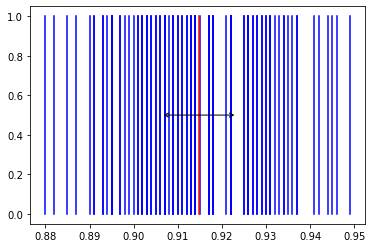

In [8]:
plt.clf()
plt.plot((T,T),(0,1), 'blue')
plt.plot((Tmoy,Tmoy),(0,1), 'red', label='Valeur moyenne')
plt.annotate('',xy=(Tmoy-u_T/2,0.5),xytext=(Tmoy+u_T/2,0.5), arrowprops=dict(arrowstyle='<->'))
plt.show()

Une autre représentation est l'histogramme, ce qui permet de mieux visualiser les choses:

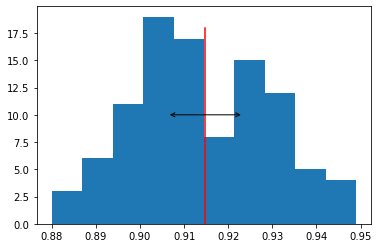

In [9]:
plt.clf()
plt.hist(T, bins='rice')
plt.plot((Tmoy,Tmoy),(0,18),'red')
plt.annotate('',xy=(Tmoy-u_T/2,10),xytext=(Tmoy+u_T/2,10), arrowprops=dict(arrowstyle='<->'))
plt.show()

## 1000 mesures ou plus

Vous réalisé maintenant 1000 mesures. La fonction ci-dessous permet de générer un ensemble de mesure tel que la valeur moyenne soit $T$ et l'écart type $u(T)$. 

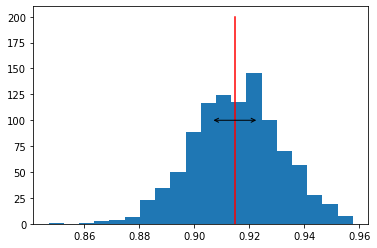

In [10]:
N = 1000 # Nombre de mesures
T = Tmoy + u_T*rd.normal(0,1,N)

plt.clf()
plt.hist(T, bins='rice')
plt.plot((Tmoy,Tmoy),(0,200),'red')
plt.annotate('',xy=(Tmoy-u_T/2,N/10),xytext=(Tmoy+u_T/2,N/10), arrowprops=dict(arrowstyle='<->'))
plt.show()

**A vous de jouer**
>Vous pouvez changer dans les lignes ci-dessous le nombre de mesure et/ou l'écart type $u_T$ pour comprendre l'influence de ces deux paramètres. 

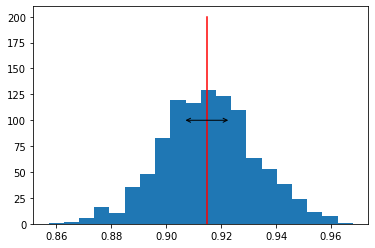

In [11]:
N = 1000 # Nombre de mesures
T = Tmoy + u_T*rd.normal(0,1,N)

plt.clf()
plt.hist(T, bins='rice')
plt.plot((Tmoy,Tmoy),(0,200),'red')
plt.annotate('',xy=(Tmoy-u_T/2,N/10),xytext=(Tmoy+u_T/2,N/10), arrowprops=dict(arrowstyle='<->'))
plt.show()

# Ecart normalisé

Un autre groupe a effectué des mesures. Vous voulez voir si vos deux ensemble de mesures sont compatibles. Nous allons générer aléatoirement les mesures de chaque groupe. Chaque groupe a calculé la valeur moyenne $T_{moy}$ de ces données et l'écart-type $u(T)$

## Premier groupe

In [12]:
Tmoy1 = 0.915
u_T1 = 0.017

# Génération de 1000 valeurs aléatoires qui suivent la valeur moyenne et l'écart-type ci-dessus
N = 1000 
T1 = Tmoy1 + u_T1*rd.normal(0,1,N)

## Deuxième groupe

In [13]:
Tmoy2 = 0.934
u_T2 = 0.020

# Génération de 1000 valeurs aléatoires qui suivent la valeur moyenne et l'écart-type ci-dessus
N = 1000 
T2 = Tmoy2 + u_T2*rd.normal(0,1,N)

## Représentation des résultats

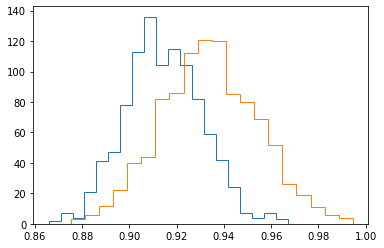

In [14]:
plt.clf()
plt.hist(T1, bins='rice', histtype = 'step')
plt.hist(T2, bins='rice', histtype = 'step')
plt.show()

## Calcul de l'écart normalisé

In [15]:
En = abs(Tmoy2-Tmoy1)/np.sqrt(u_T1**2 + u_T2**2)
print("L'écart normalisé vaut En = ", format(En, "#.1g"))

L'écart normalisé vaut En =  0.7


**A vous de jouer**
> Modifier les lignes de codes ci-dessous pour le deuxième groupe afin de trouver un écart normalisé de 2. Le choix d'avoir choisi un écart normalisé de 2 vous parait-il pertinent? 